In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the regression dataset(employee payroll)
df = pd.read_csv("https://media.githubusercontent.com/media/SakibUzZaman99/CSE445-ML/refs/heads/main/City%20Employee%20Payroll%20Current.csv?fbclid=IwY2xjawIcaApleHRuA2FlbQIxMAABHS60RVi7buZBPWeFaQCezArIOgemFKQC_vfrGhkzXagZ2Zrf6BEk6_VDhw_aem_dlIfOmLYkodQU5yF2MEsPw",
          dtype={0: str, 10: str})  # Replace col 1 & 10 with str as they've mixed data types

#prints first 6 rows
df.head(6)

,RECORD_NBR,PAY_YEAR,LAST_NAME,FIRST_NAME,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,...,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,ROW_ID
0,303030303233,2017,ESCOBEDO,JOSE,70,POLICE,2214-2,POLICE OFFICER II,FULL_TIME,ACTIVE,...,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,5835.35,2241.75,99703.95,27042.10,16819.00,MALE,HISPANIC,17303030303233702214-2FT
1,3030303032,2017,VILLEGAS,JOSE,44,LIBRARY,1172-1,LIBRARY ASSISTANT I,FULL_TIME,ACTIVE,...,CLERICAL,65332.56,0.00,0.00,65332.56,19377.64,7528.44,MALE,HISPANIC,173030303032441172-1FT
2,303030303433,2017,LIPSCOMB,PAUL,42,HARBOR,0801-1,PORT WARDEN I,FULL_TIME,NOT_ACTIVE,...,LOS ANGELES PORT POLICE COMMAND OFFICERS,184110.40,0.00,1750.00,185860.40,86255.72,6518.28,MALE,CAUCASIAN,17303030303433420801-1FT
3,3030303035,2017,BAUTISTA,RONALD,88,RECREATION AND PARKS,3141-0,GARDENER CARETAKER,FULL_TIME,ACTIVE,...,EQUIPMENT OPERATION AND LABOR,55628.80,2129.02,200.00,57957.82,16499.50,14946.17,MALE,HISPANIC,173030303035883141-0FT
4,3030303037,2017,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,9191-1,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,FULL_TIME,ACTIVE,...,TECHNICAL,132912.00,0.00,350.00,133262.00,39421.70,6446.75,FEMALE,HISPANIC,173030303037229191-1FT
5,303030303933,2017,PERRY,BRETT,82,PUBLIC WORKS - SANITATION,7871-1,ENVIRONMENTAL ENGINEERING ASSOCIATE I,FULL_TIME,NOT_ACTIVE,...,PROFESSIONAL ENGINEERING AND SCIENTIFIC,22838.40,0.00,150.00,22988.40,6773.87,2243.03,MALE,CAUCASIAN,17303030303933827871-1FT


In [3]:
#no. of rows & columns
df.shape

(554302, 21)

In [4]:
#Print all the data types and their unique values & its quantity
for column in df.columns:
    print(f"Data Type: {df[column].dtype}") #data type
    print(f"{df[column].nunique()} types of unique values")  # Count of unique values
    print(df[column].value_counts())        #how many sample/value of that one particular unique value
    print()

Data Type: object
106288 types of unique values
RECORD_NBR
343635313833      20
3438323333        19
393432353833      19
3130333837        18
3537393535        18
                  ..
WP393838373335     1
WP393836333231     1
WP393835373939     1
WP393834363830     1
WP393834353133     1
Name: count, Length: 106288, dtype: int64

Data Type: int64
8 types of unique values
PAY_YEAR
2018    78663
2019    74019
2017    72415
2020    71843
2023    70833
2022    68946
2021    65585
2024    51998
Name: count, dtype: int64

Data Type: object
31854 types of unique values
LAST_NAME
GARCIA            5476
RODRIGUEZ         4815
LOPEZ             4652
HERNANDEZ         4594
MARTINEZ          4360
                  ... 
PUKLAVETZ            1
WIKOFF               1
SUAREZ ALCARAZ       1
MIRZOIAN             1
NEGRIN               1
Name: count, Length: 31854, dtype: int64

Data Type: object
16666 types of unique values
FIRST_NAME
MICHAEL     10008
DAVID        8442
JOSE         6970
ROBERT       

In [5]:
#Checking if there's any missing values
df.isnull().sum()

RECORD_NBR                           0
PAY_YEAR                             0
LAST_NAME                           13
FIRST_NAME                           0
DEPARTMENT_NO                        0
DEPARTMENT_TITLE                     0
JOB_CLASS_PGRADE                   232
JOB_TITLE                          232
EMPLOYMENT_TYPE                      0
JOB_STATUS                           0
MOU                                232
MOU_TITLE                          385
REGULAR_PAY                          0
OVERTIME_PAY                         0
ALL_OTHER_PAY                        0
TOTAL_PAY                            0
CITY_RETIREMENT_CONTRIBUTIONS        0
BENEFIT_PAY                          0
GENDER                               1
ETHNICITY                        12513
ROW_ID                               0
dtype: int64

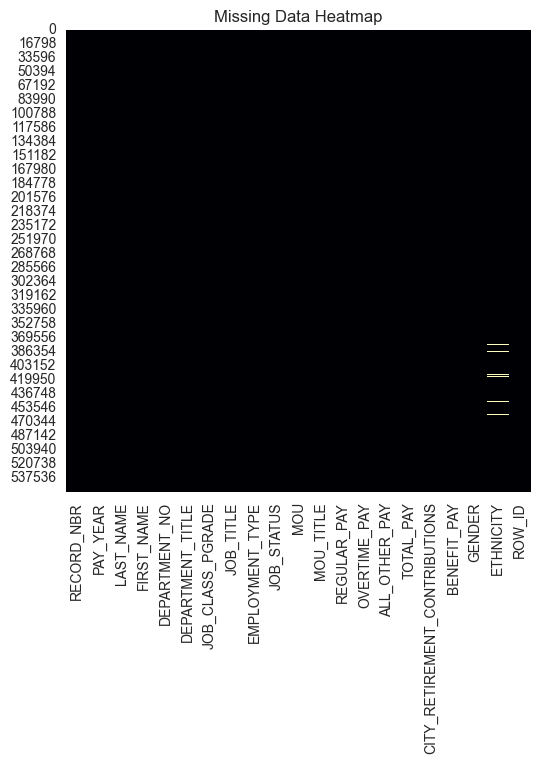

In [6]:
#Visual representation of missing data
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title('Missing Data Heatmap')
plt.show()

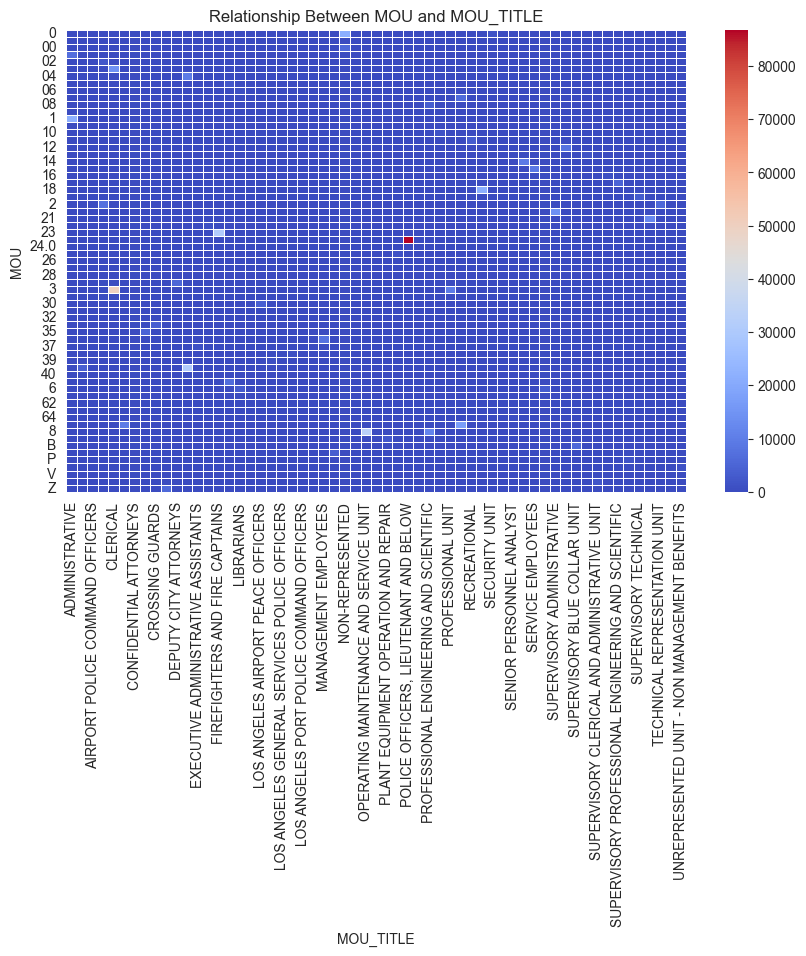

In [7]:
#Just a Relationship Between MOU and MOU_TITLE
#Create a crosstab (frequency table)
crosstab = pd.crosstab(df["MOU"], df["MOU_TITLE"])

# Plot as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Relationship Between MOU and MOU_TITLE")
plt.xlabel("MOU_TITLE")
plt.ylabel("MOU")
plt.xticks(rotation=90)
plt.show()

In [8]:
df_dropped = df.copy() # Create a copy of df and assign it to df_dropped
#DROPPING AS THEY DON'T CONTRIBUTE

df_dropped = df_dropped.drop(columns=['FIRST_NAME', 'LAST_NAME', 'ROW_ID',
                                       'JOB_CLASS_PGRADE', 'MOU'])

#dropping the 1 row where gender column has a missing value
df_dropped = df_dropped.dropna(subset=['GENDER'])

#no. of rows & columns AGAIN
df_dropped.shape

(554301, 16)

In [9]:
#to check new dataset with dropped column(printing first 6 rows)
df_dropped.head(6)

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303233,2017,70,POLICE,POLICE OFFICER II,FULL_TIME,ACTIVE,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,5835.35,2241.75,99703.95,27042.10,16819.00,MALE,HISPANIC
1,3030303032,2017,44,LIBRARY,LIBRARY ASSISTANT I,FULL_TIME,ACTIVE,CLERICAL,65332.56,0.00,0.00,65332.56,19377.64,7528.44,MALE,HISPANIC
2,303030303433,2017,42,HARBOR,PORT WARDEN I,FULL_TIME,NOT_ACTIVE,LOS ANGELES PORT POLICE COMMAND OFFICERS,184110.40,0.00,1750.00,185860.40,86255.72,6518.28,MALE,CAUCASIAN
3,3030303035,2017,88,RECREATION AND PARKS,GARDENER CARETAKER,FULL_TIME,ACTIVE,EQUIPMENT OPERATION AND LABOR,55628.80,2129.02,200.00,57957.82,16499.50,14946.17,MALE,HISPANIC
4,3030303037,2017,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,FULL_TIME,ACTIVE,TECHNICAL,132912.00,0.00,350.00,133262.00,39421.70,6446.75,FEMALE,HISPANIC
5,303030303933,2017,82,PUBLIC WORKS - SANITATION,ENVIRONMENTAL ENGINEERING ASSOCIATE I,FULL_TIME,NOT_ACTIVE,PROFESSIONAL ENGINEERING AND SCIENTIFIC,22838.40,0.00,150.00,22988.40,6773.87,2243.03,MALE,CAUCASIAN


In [10]:
#Filling missing values with unknown since these columns is categorical
df_dropped['JOB_TITLE'] = df['JOB_TITLE'].fillna('Unknown')
df_dropped['MOU_TITLE'] = df['MOU_TITLE'].fillna('Unknown')
df_dropped['ETHNICITY'] = df['ETHNICITY'].fillna('Unknown')

In [11]:
#Converting categorical to numerical values bcz some models need numerical inputs to process them
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df_dropped.select_dtypes(include=['object']).columns:
    df_dropped[col] = encoder.fit_transform(df_dropped[col])

In [12]:
#Standardizing numerical values(Feature Scaling)
#We chose Standardization (Z-score Normalization) bcz it transforms data to have mean=0 & std.dev=1 & good for ML models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_dropped.select_dtypes(include=[np.number]).columns # Select numerical columns from df_dropped
df_dropped[numeric_cols] = scaler.fit_transform(df_dropped[numeric_cols]) # Standardize df_dropped

In [13]:
#Checking AGAIN if there's any missing values
df_dropped.isnull().sum()

RECORD_NBR                       0
PAY_YEAR                         0
DEPARTMENT_NO                    0
DEPARTMENT_TITLE                 0
JOB_TITLE                        0
EMPLOYMENT_TYPE                  0
JOB_STATUS                       0
MOU_TITLE                        0
REGULAR_PAY                      0
OVERTIME_PAY                     0
ALL_OTHER_PAY                    0
TOTAL_PAY                        0
CITY_RETIREMENT_CONTRIBUTIONS    0
BENEFIT_PAY                      0
GENDER                           0
ETHNICITY                        0
dtype: int64

In [14]:
print(df_dropped.describe())

         RECORD_NBR      PAY_YEAR  DEPARTMENT_NO  DEPARTMENT_TITLE  \
count  5.543010e+05  5.543010e+05   5.543010e+05      5.543010e+05   
mean  -5.250546e-17  2.343713e-14  -3.937910e-17      1.296229e-16   
std    1.000001e+00  1.000001e+00   1.000001e+00      1.000001e+00   
min   -1.726732e+00 -1.476691e+00  -2.148419e+00     -2.359783e+00   
25%   -8.677021e-01 -1.031420e+00  -8.558187e-01     -6.066625e-01   
50%   -2.547476e-03 -1.408790e-01   1.646555e-01      2.374324e-01   
75%    8.615590e-01  7.496624e-01   7.769401e-01      7.568754e-01   
max    1.754654e+00  1.640204e+00   1.117098e+00      1.081527e+00   

          JOB_TITLE  EMPLOYMENT_TYPE    JOB_STATUS     MOU_TITLE  \
count  5.543010e+05     5.543010e+05  5.543010e+05  5.543010e+05   
mean   1.410059e-16    -3.363631e-17 -3.158532e-17  6.563183e-18   
std    1.000001e+00     1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.019545e+00    -4.725736e-01 -6.441213e-01 -1.527058e+00   
25%   -7.419588e-01    -4.725

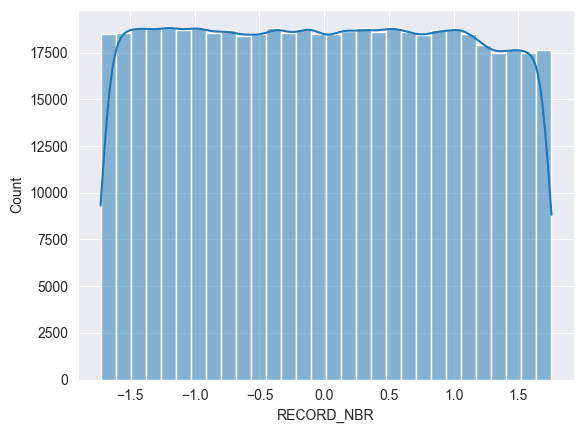

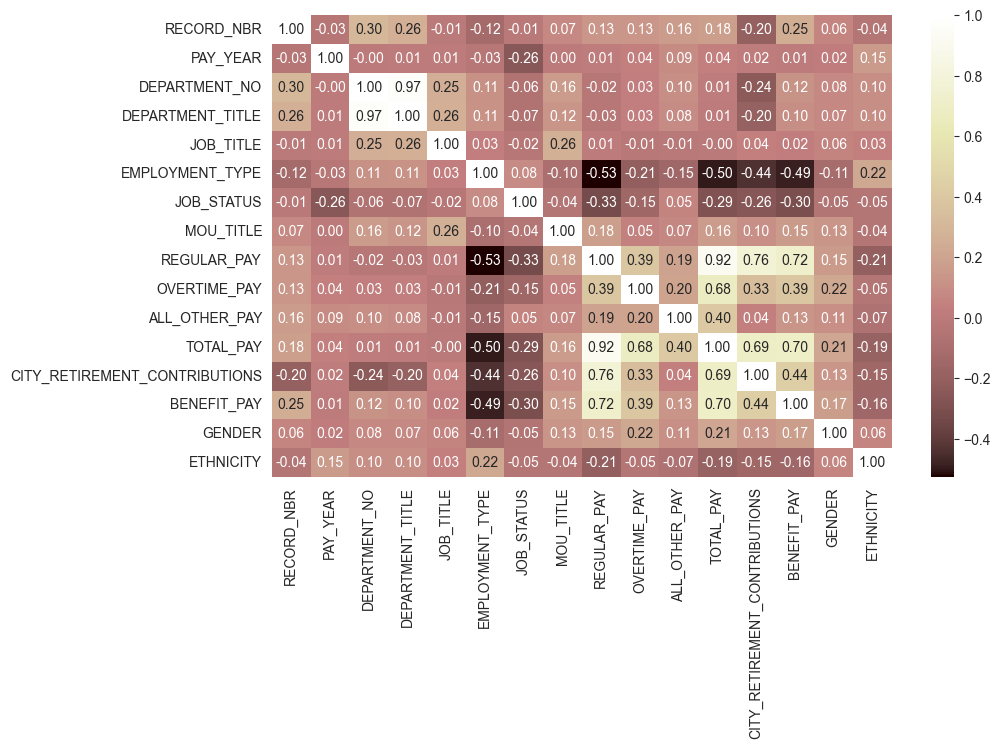

In [15]:
# Distribution of a numeric column
sns.histplot(df_dropped[numeric_cols[0]], bins=30, kde=True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_dropped.corr(), annot=True, cmap='pink', fmt='.2f')
plt.show()

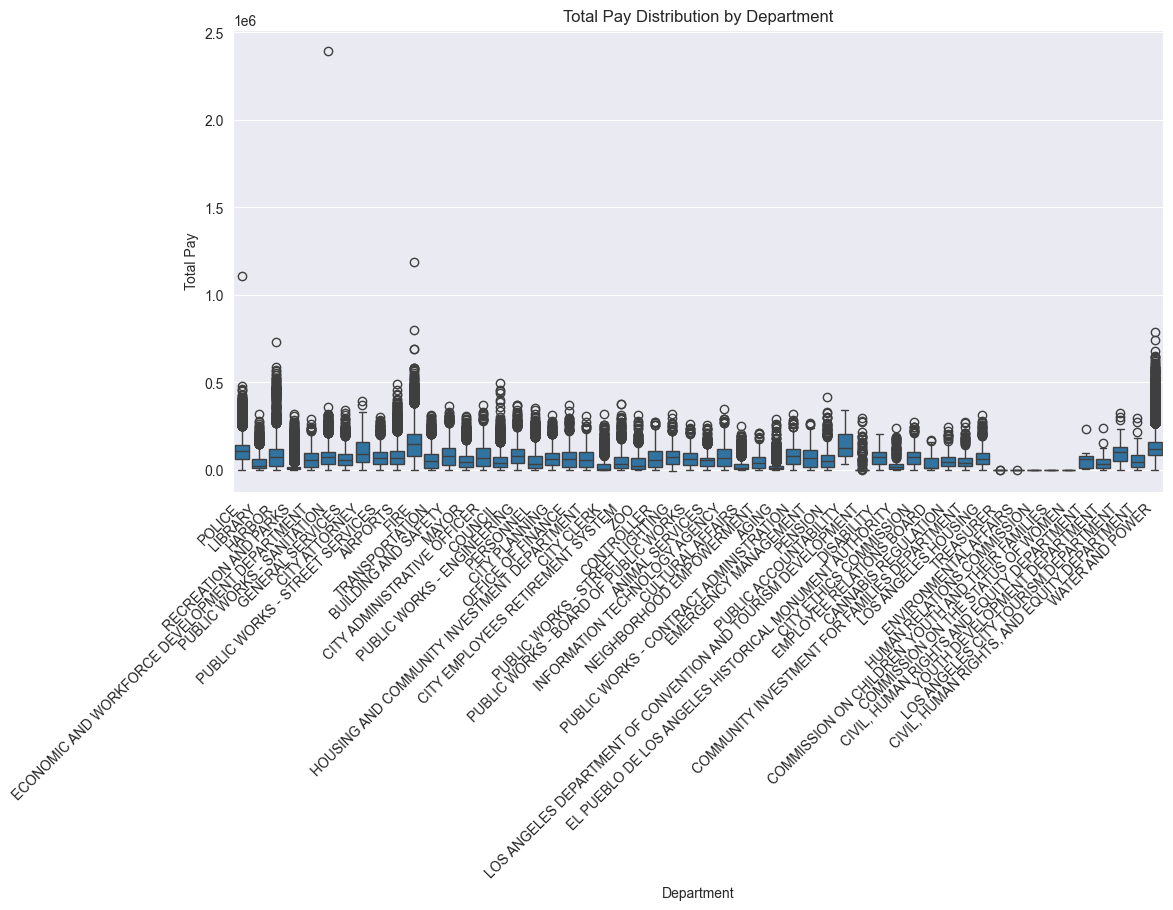

In [16]:
# Visualization: Box Plot of Total Pay by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEPARTMENT_TITLE', y='TOTAL_PAY', data=df)
plt.title('Total Pay Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()

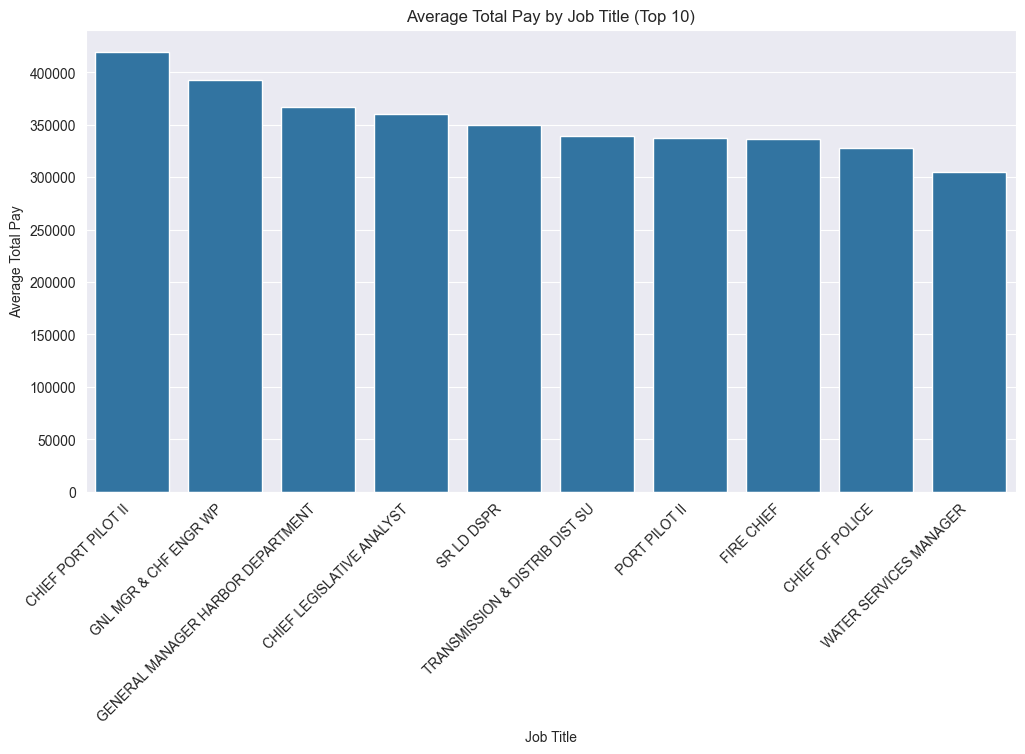

In [17]:
# Visualization: Bar plot of average total pay by job title (top 10)
avg_pay_by_job = df.groupby('JOB_TITLE')['TOTAL_PAY'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='JOB_TITLE', y='TOTAL_PAY', data=avg_pay_by_job)
plt.title('Average Total Pay by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()

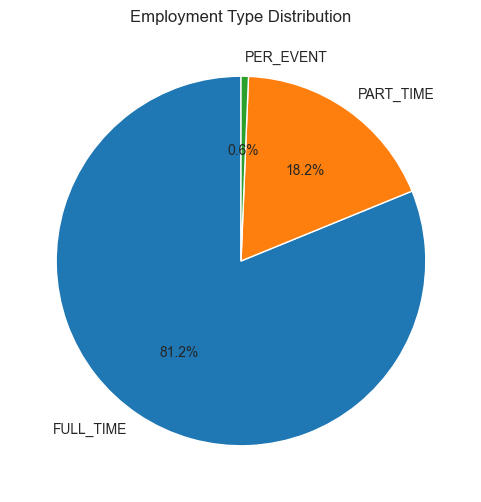

In [18]:
# Visualization: Pie chart of Employment Type distribution
employment_type_counts = df['EMPLOYMENT_TYPE'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employment Type Distribution')
plt.show()

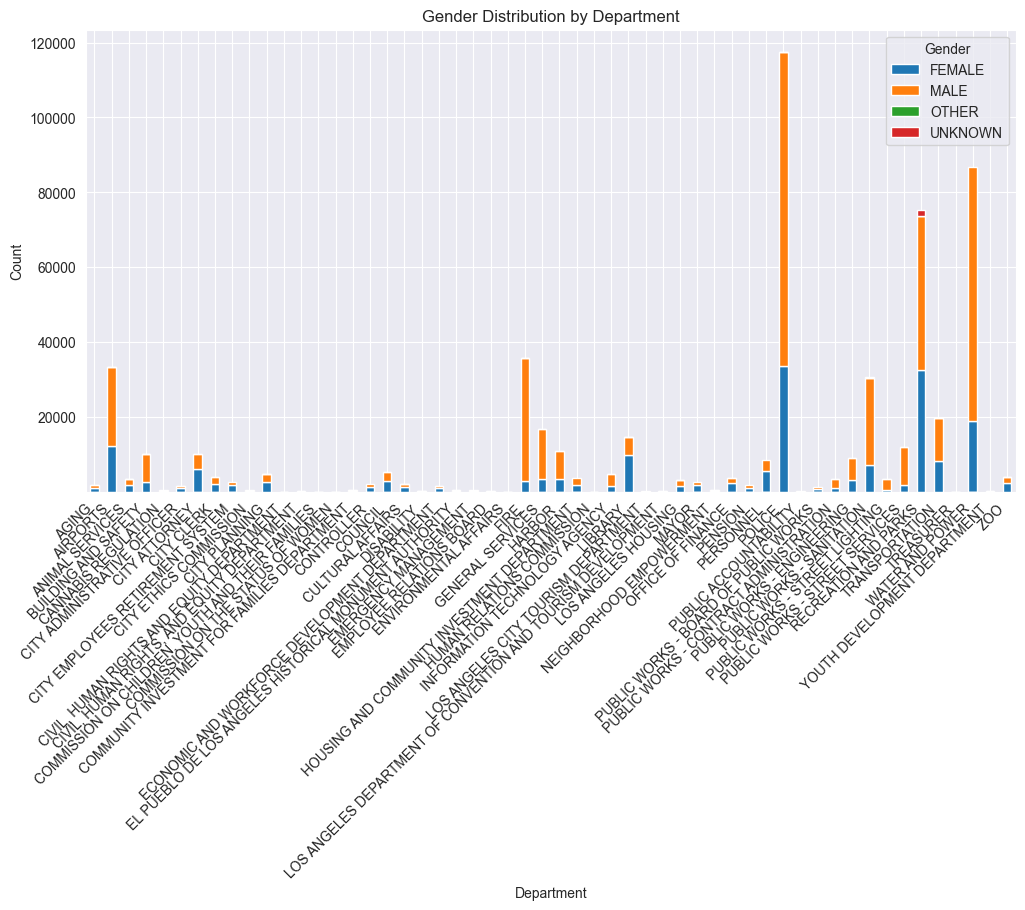

In [19]:
# Visualization: Stacked bar chart of Gender distribution by Department
department_gender_counts = pd.crosstab(df['DEPARTMENT_TITLE'], df['GENDER'])
department_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()